In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score ,  roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

In [69]:
dataframe = pd.read_csv('Titanic.csv')
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataframe.shape

(891, 12)

In [11]:
## Let's check the Nan data
Nan = pd.concat([dataframe.isna().sum()], axis=1, keys=["Nan"])
Nan[Nan.sum(axis=1) > 0]    , axis=1

,Nan
Age,177
Cabin,687
Embarked,2


In [70]:
## Let's fill the missing age value with Mean
dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean())
dataframe['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [71]:
## Let's fill cabin and Embarked values with most common values, which means we will utilize mode here
dataframe['Embarked'] = dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0])
dataframe['Cabin'] = dataframe['Cabin'].fillna(dataframe['Cabin'].mode()[0])
dataframe['Cabin'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Cabin, Length: 891, dtype: bool

In [28]:
dataframe['Cabin'].mode()

0    B96 B98
dtype: object

In [72]:
## ## Let's check the Nan data again
Nan = pd.concat([dataframe.isna().sum()], axis=1, keys=["Nan"])
Nan[Nan.sum(axis=1) > 0]   

,Nan


In [73]:
## We have categorical columns as well, and now we have two options  1. To drop the categorical columns 2. Put the dummies for cat

## Create a copy of the dataframe
data =  dataframe

## dropping all the categorical columns

non_floats = []
for col in data:
    if data[col].dtypes == "object":
        non_floats.append(col)
data = data.drop(columns=non_floats)
data.shape

## using dummies column

for col in dataframe.dtypes[dataframe.dtypes == 'object'].index:
    dummy  = dataframe.pop(col)
    dataframe = pd.concat([dataframe, pd.get_dummies(dummy, prefix= col)], axis = 1)
dataframe.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,29.699118,0,0,8.4583,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,2.000000,3,1,21.0750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,27.000000,0,2,11.1333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,14.000000,1,0,30.0708,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
## Now let's seperate our training and testing dataset

label = data.pop("Survived")
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
873,874,3,47.000000,0,0,9.0000
469,470,3,0.750000,2,1,19.2583
425,426,3,29.699118,0,0,7.2500
828,829,3,29.699118,0,0,7.7500
590,591,3,35.000000,0,0,7.1250
...,...,...,...,...,...,...
533,534,3,29.699118,0,2,22.3583
231,232,3,29.000000,0,0,7.7750
141,142,3,22.000000,0,0,7.7500
72,73,2,21.000000,0,0,73.5000


In [93]:

rn = RandomForestClassifier(n_estimators=50)
rn.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [94]:
y_pred = rn.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc_score = auc(fpr, tpr)
roc_auc_score

0.6478883023061962

In [121]:
## Let's create a for loop for testing different n_estimators
n_estimators = [10,20,30,50]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators= estimator)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    fpr, tpr, threshold = roc_curve(y_train, train_pred)
    roc_auc_score_train = auc(fpr, tpr)
    train_results.append(roc_auc_score_test)

    test_pred = rf.predict(x_test)
    fpr, tpr, threshold = roc_curve(y_test, test_pred)
    roc_auc_score_test = auc(fpr, tpr)
    test_results.append(roc_auc_score_test)

    

In [106]:
## Visulaizing the train and test results
def visualize_train_test_accuracy(x_axis,x_data,y_data1,y_data2, y_axis = 'AUC score',label1="Train AUC", label2="Test AUC"):
    line1, = plt.plot(x_data, y_data1, "b" , label = label1)
    line2, = plt.plot(x_data, y_data2, "r" , label = label2)
    plt.legend(handler_map = {line1 : HandlerLine2D(numpoints=2)})
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

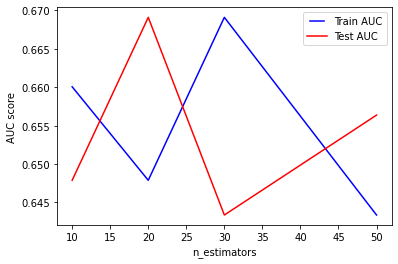

In [122]:
visualize_train_test_accuracy(x_axis='n_estimators',x_data=n_estimators,y_data1=train_results, y_data2=test_results)

### From the above graph we get to know that, the n_estimator value of somewhere around 20 is the best hyperparamter.

In [129]:
## Let's create a for loop for testing different depths
max_depth = [1,2,3,4,5,10,15,20,30,50]
train_results = []
test_results = []

for md in max_depth:
    rf = RandomForestClassifier(n_estimators= 15, max_depth=md)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    fpr, tpr, threshold = roc_curve(y_train, train_pred)
    roc_auc_score_train = auc(fpr, tpr)
    train_results.append(roc_auc_score_train)

    test_pred = rf.predict(x_test)
    fpr, tpr, threshold = roc_curve(y_test, test_pred)
    roc_auc_score_test = auc(fpr, tpr)
    test_results.append(roc_auc_score_test)


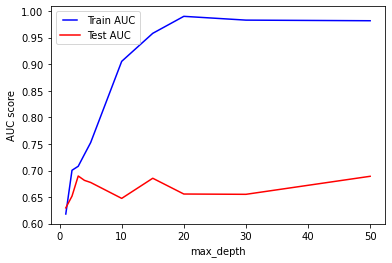

In [130]:
visualize_train_test_accuracy(x_axis='max_depth',x_data=max_depth,y_data1=train_results, y_data2=test_results)

In [116]:
### The above graph shows that, max depth of 5 is best for test data

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]